In [8]:
import numpy as np
import pandas as pd

In [9]:
import csv

df = pd.read_csv("/content/athlete_events.csv", on_bad_lines='skip')

region_df = pd.read_csv('/content/noc_regions.csv')

In [10]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [11]:
df = df[df['Season'] == 'Summer']

In [12]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271106,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN
271107,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN
271108,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN
271109,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN


In [13]:
df = df.merge(region_df,on='NOC',how = 'left')

In [14]:
df['region'].value_counts()

,count
region,
USA,15064
Germany,12377
UK,10917
France,10633
Russia,8855
...,...
Kiribati,11
Brunei,10
Timor-Leste,8


In [15]:
df.isnull().sum()

,0
ID,0
Name,0
Sex,0
Age,9189
Height,51857
Weight,53854
Team,0
NOC,0
Games,0
Year,0


In [16]:
df.duplicated().sum()

1385

In [17]:
df.drop_duplicates(inplace = True)

In [18]:
df['Medal'].value_counts()

,count
Medal,
Gold,11456
Bronze,11409
Silver,11212


In [19]:
pd.get_dummies(df['Medal'],dtype = int)

,Bronze,Gold,Silver
0,0,0,0
1,0,0,0
2,0,0,0
3,0,1,0
4,0,0,0
...,...,...,...
222547,0,0,0
222548,0,0,0
222549,0,0,0
222550,0,0,0


In [20]:
df = pd.concat([df,pd.get_dummies(df['Medal'],dtype = int)],axis=1)

In [21]:
df.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending = False).reset_index()

,NOC,Gold,Silver,Bronze
0,USA,2472,1333,1197
1,URS,832,635,596
2,GBR,635,729,620
3,GER,592,538,649
4,ITA,518,474,454
...,...,...,...,...
225,AHO,0,1,0
226,LBR,0,0,0
227,LCA,0,0,0
228,LES,0,0,0


In [22]:
medal_tally = df.drop_duplicates(subset = ['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [23]:
medal_tally = medal_tally.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending = False).reset_index()

In [24]:
medal_tally['total'] = medal_tally['Gold'] +medal_tally['Silver'] +medal_tally['Bronze']

In [25]:
medal_tally

,region,Gold,Silver,Bronze,total
0,USA,1035,802,708,2545
1,Russia,592,498,487,1577
2,Germany,444,457,491,1392
3,UK,278,317,300,895
4,France,234,256,287,777
...,...,...,...,...,...
200,Lesotho,0,0,0,0
201,Albania,0,0,0,0
202,Libya,0,0,0,0
203,Liechtenstein,0,0,0,0


In [26]:
year = df['Year'].unique().tolist()

In [27]:
year.sort()

In [28]:
year.insert(0,'Overall')

In [29]:
year

['Overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [30]:
country = np.unique(df['region'].dropna().values).tolist()

In [31]:
country.sort()

In [32]:
country.insert(0,'Overall')

In [33]:
country

['Overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

In [34]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222547,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN,0,0,0
222548,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN,0,0,0
222549,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0
222550,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0


In [35]:
medal_df = df.drop_duplicates(subset = ['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [36]:
def fetch_medal_tally(df,year,country):
  medal_df = df.drop_duplicates(subset = ['Team','NOC','Games','Year','City','Sport','Event','Medal'])
  flag = 0
  if year == 'Overall' and country == 'Overall':
    temp_df = medal_df
  if year  == 'Overall' and country !='Overall':
    flag = 1
    temp_df = medal_df[medal_df['region']==country]
  if year  != 'Overall' and country =='Overall':
    temp_df = medal_df[medal_df['Year']==int(year)]
  if year  != 'Overall' and country !='Overall':
    temp_df = medal_df[(medal_df['region']==country) & (medal_df['Year']==int(year))]

  if flag == 1:
    x = medal_tally.groupby('Year').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending = False).reset_index()
  else:
    x = medal_tally.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending = False).reset_index()


  x['total'] = x['Gold'] + x['Silver'] + x['Bronze']

  print(x)


In [37]:
nation_over_time = df.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index().sort_values('Year')

In [38]:
nation_over_time

,Year,count
28,1896,12
22,1900,31
27,1904,14
26,1906,20
25,1908,22
24,1912,29
23,1920,29
21,1924,45
20,1928,46
19,1932,47


In [39]:
nation_over_time = nation_over_time.rename(columns={'Year':'Edition','count':'Number of country'})

In [40]:
import plotly.express as px

In [41]:
fig  = px.line(nation_over_time,x  = 'Edition',y = 'Number of country')
fig.show()

In [42]:
x = df.drop_duplicates(['Year','Sport','Event'])

<Axes: xlabel='Year', ylabel='Sport'>

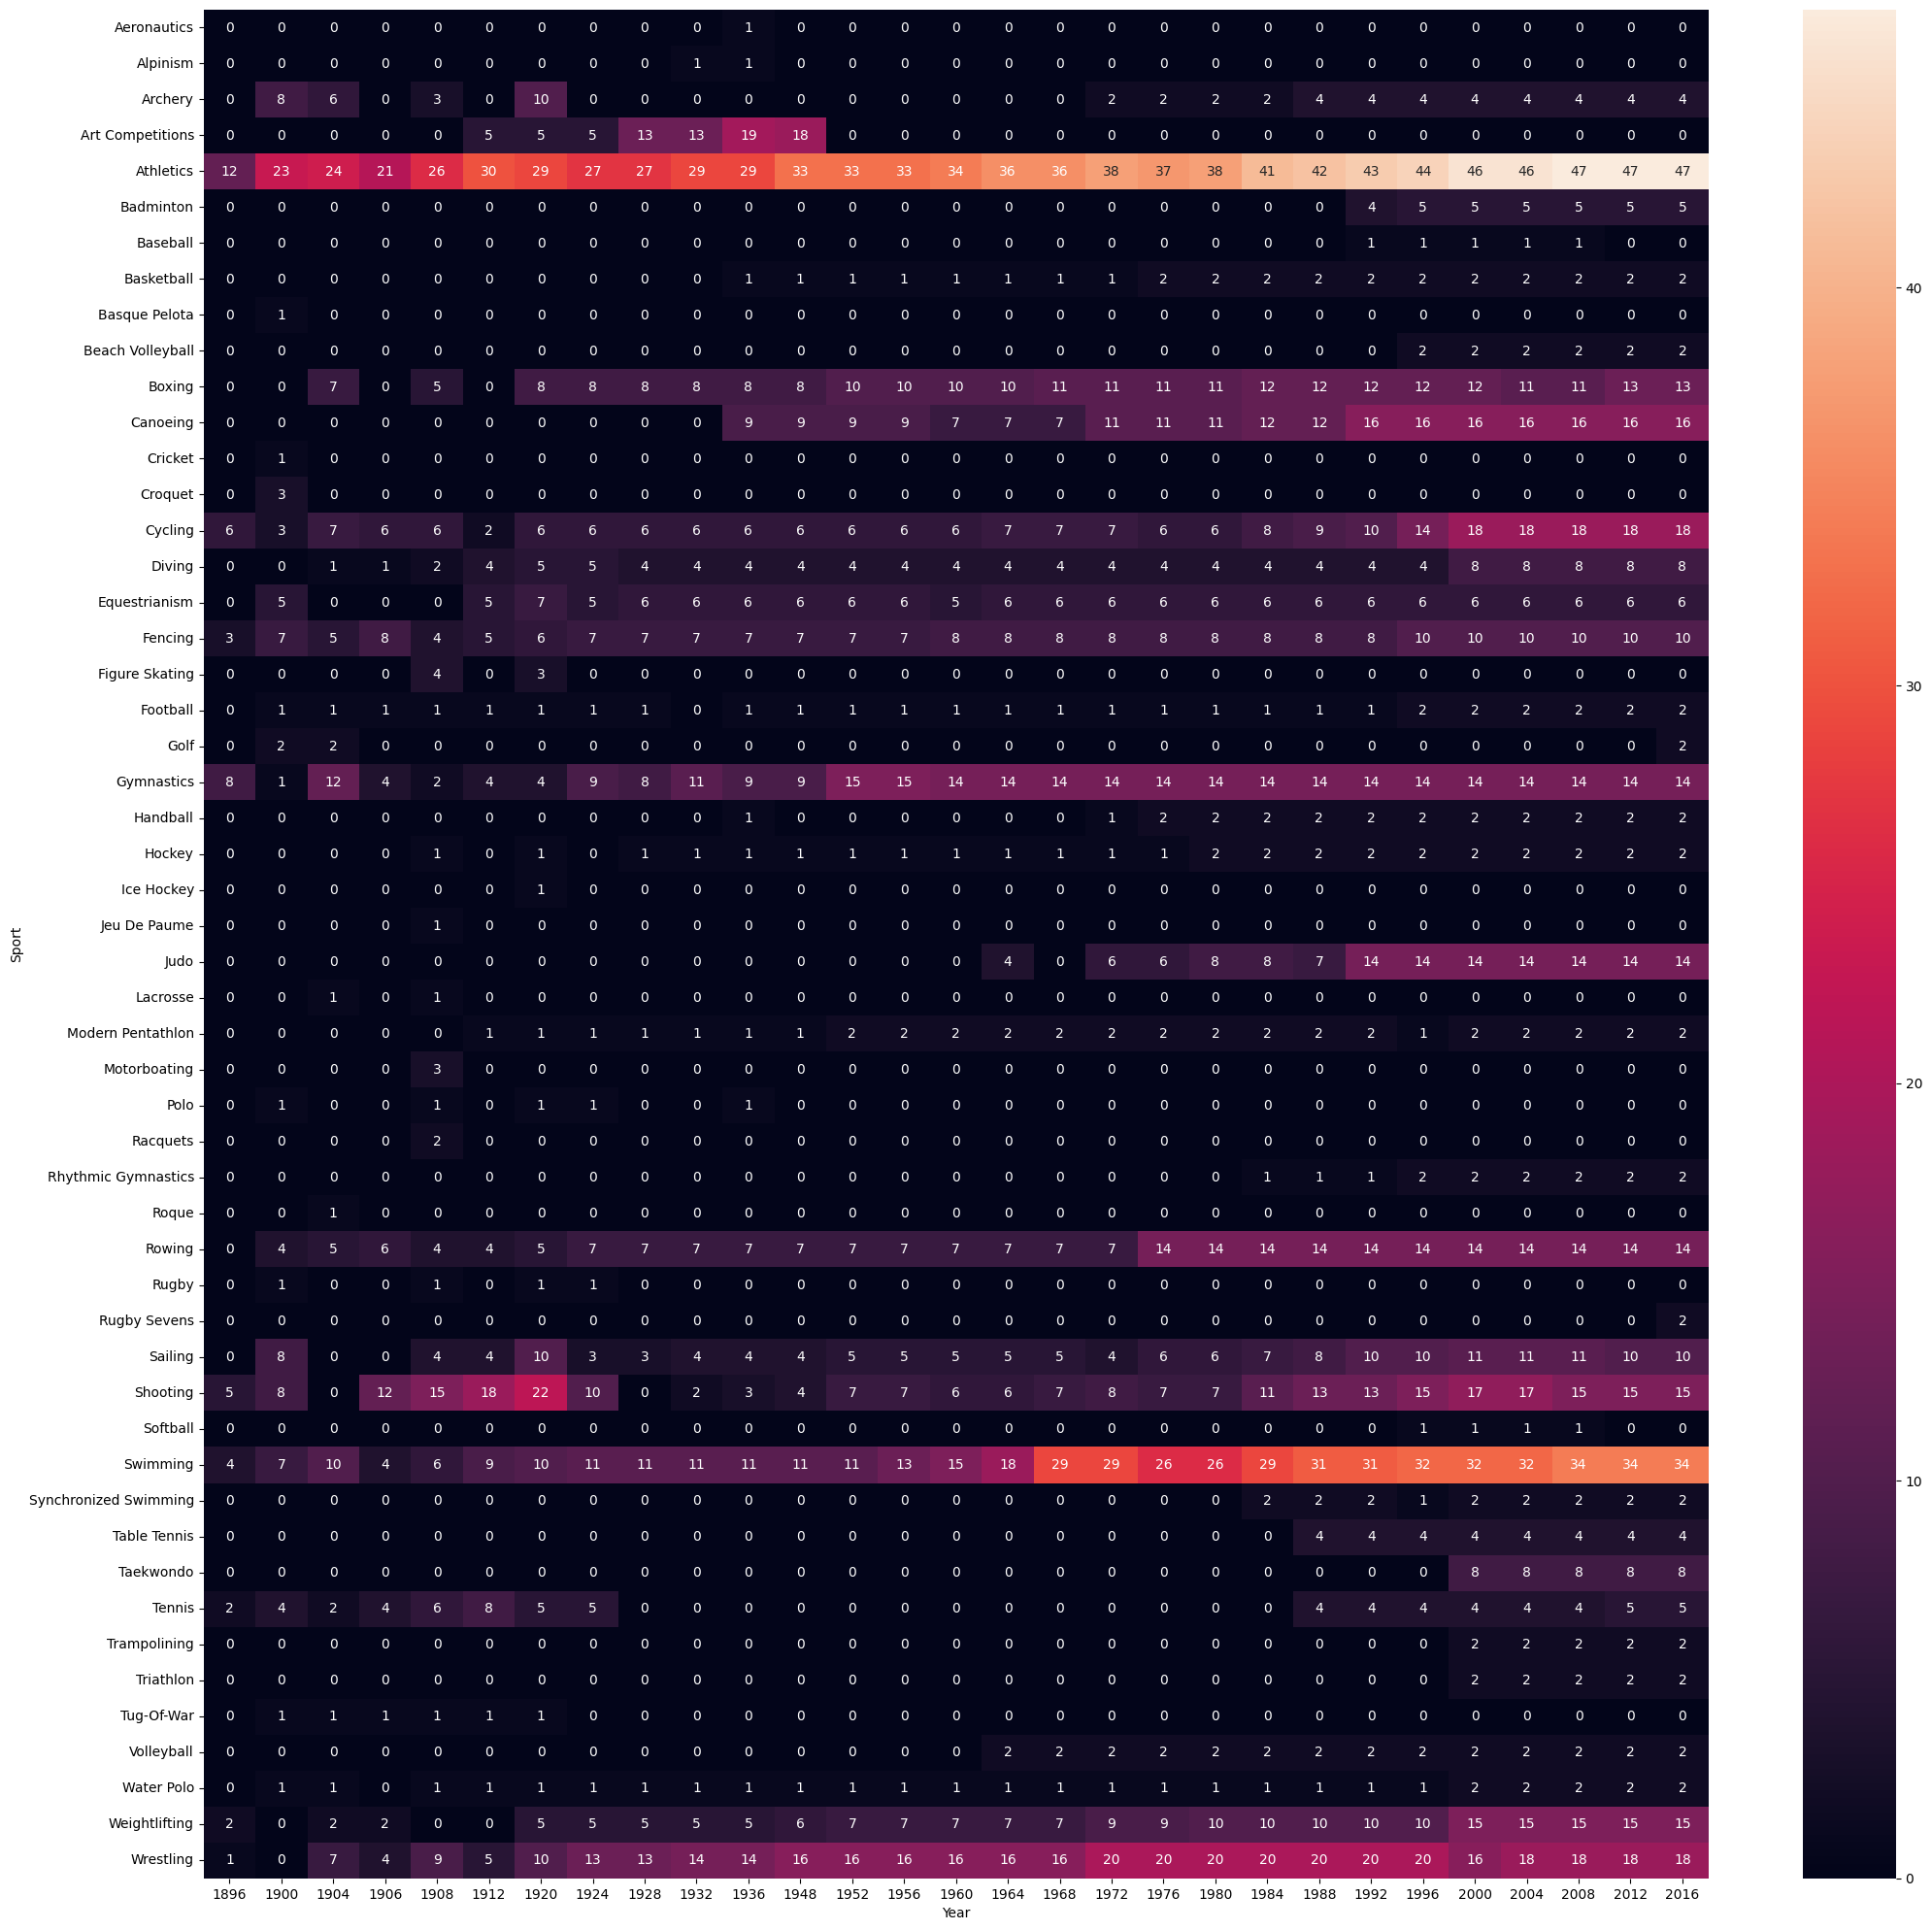

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (25,25))
sns.heatmap(x.pivot_table(index = 'Sport',columns = 'Year',values = 'Event',aggfunc = 'count').fillna(0).astype('int'),annot = True)

In [44]:
def most_successful(df,sport):
  temp_df = df.dropna(subset = ['Medal'])
  if sport != 'Overall':
    temp_df = temp_df[temp_df['Sport']==sport]

  x =  temp_df['Name'].value_counts().reset_index().head(15).merge(df,on = 'Name',how = 'left')[['Name','count','Sport','region']].drop_duplicates('Name')
  x.rename(columns = {'count':'Medals'},inplace = True)
  return x

In [45]:
most_successful(df,'Overall')

,Name,Medals,Sport,region
0,"Michael Fred Phelps, II",28,Swimming,USA
30,Larysa Semenivna Latynina (Diriy-),18,Gymnastics,Russia
49,Nikolay Yefimovich Andrianov,15,Gymnastics,Russia
73,Borys Anfiyanovych Shakhlin,13,Gymnastics,Russia
97,Takashi Ono,13,Gymnastics,Japan
130,Edoardo Mangiarotti,13,Fencing,Italy
144,"Dara Grace Torres (-Hoffman, -Minas)",12,Swimming,USA
157,Aleksey Yuryevich Nemov,12,Gymnastics,Russia
178,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",12,Swimming,USA
195,Birgit Fischer-Schmidt,12,Canoeing,Germany


In [46]:
temp_df = df.dropna(subset = ['Medal'])
temp_df.drop_duplicates(subset = ['Team','NOC','Games','Year','City','Sport','Event','Medal'],inplace = True)

<ipython-input-46-e612103aeac8>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [47]:
new_df = temp_df[temp_df['region'] == "USA"]
final_df = new_df.groupby('Year').count()['Medal'].reset_index()

In [48]:
fig  = px.line(final_df,x  = 'Year',y = 'Medal')
fig.show()

In [49]:
temp_df = df.dropna(subset = ['Medal'])
temp_df.drop_duplicates(subset = ['Team','NOC','Games','Year','City','Sport','Event','Medal'],inplace = True)
new_df = temp_df[temp_df['region'] == "India"]

<ipython-input-49-d7b2d3c4d6f3>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='Year', ylabel='Sport'>

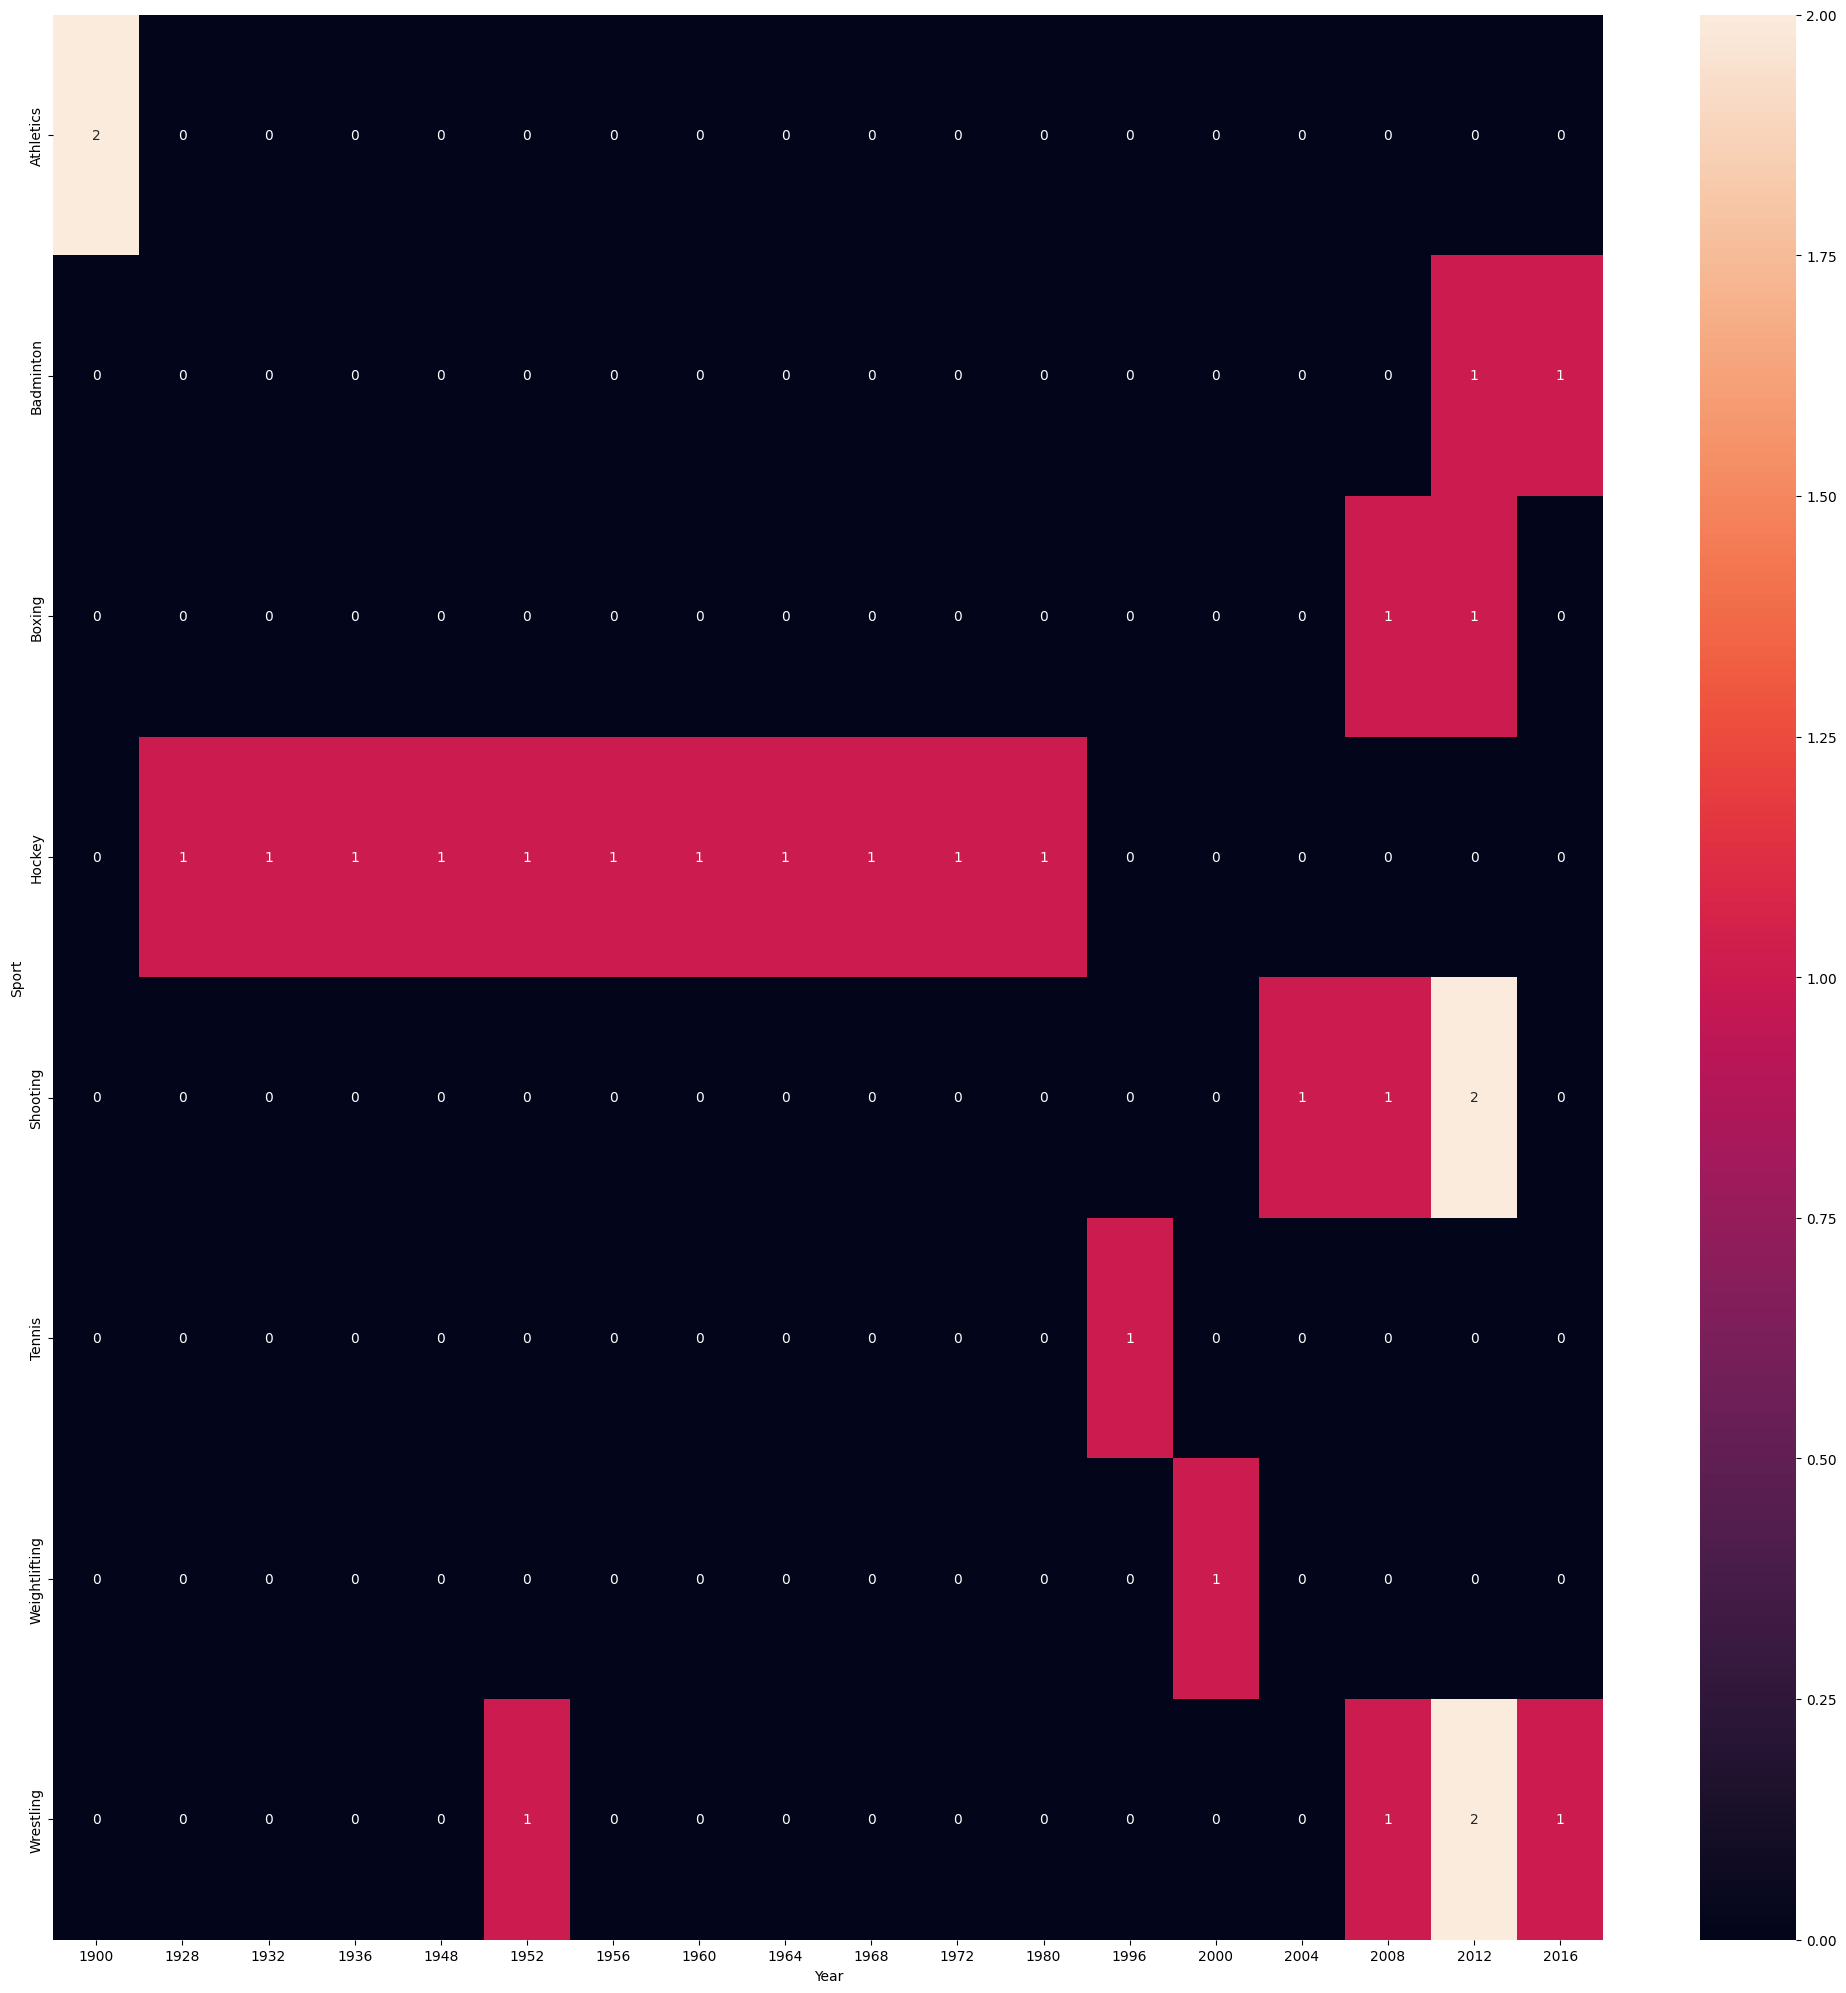

In [50]:
plt.figure(figsize = (25,25))
sns.heatmap(new_df.pivot_table(index = 'Sport',columns = 'Year',values = 'Medal',aggfunc = 'count').fillna(0).astype(int),annot=True)

In [51]:
def most_successful(df,country):
  temp_df = df.dropna(subset = ['Medal'])

  temp_df = temp_df[temp_df['region']== country]

  x =  temp_df['Name'].value_counts().reset_index().head(15).merge(df,on = 'Name',how = 'left')[['Name','count','Sport']].drop_duplicates('Name')
  x.rename(columns = {'count':'Medals'},inplace = True)
  return x

In [52]:
most_successful(df,'India')

,Name,Medals,Sport
0,Udham Singh Kular,4,Hockey
4,Leslie Walter Claudius,4,Hockey
8,Shankar Pillay Laxman,3,Hockey
11,Ranganathan Francis,3,Hockey
14,Richard James Allen,3,Hockey
17,Balbir Singh,3,Hockey
20,Harbinder Singh Chimni,3,Hockey
23,"Balbir Singh Dosanjh, Sr.",3,Hockey
26,"Victor John ""V. J."" Peter",3,Hockey
29,Dhyan Chand Bais,3,Hockey


In [ ]:
import plotly.figure_factory as ff

In [ ]:
athlete_df = df.drop_duplicates(subset= ['Name','region'])

In [56]:
x1 = athlete_df['Age'].dropna()
x2 = athlete_df[athlete_df['Medal'] =='Gold']['Age'].dropna()
x3 = athlete_df[athlete_df['Medal'] =='Silver']['Age'].dropna()
x4 = athlete_df[athlete_df['Medal'] =='Bronze']['Age'].dropna()


In [58]:
fig = ff.create_distplot([x1,x2,x3,x4],['overall age','Gold Medalist','Silver Medalist','Bronze Medalist'],show_hist = False,show_rug=False)
fig.show()